In [1]:
import sys
import os

# from src.puzzle_creators import Direction

SCRIPT_DIR = os.path.dirname(os.path.abspath(os.getcwd()+"/notebooks"))
sys.path.append(os.path.dirname(SCRIPT_DIR))


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import os
from functools import reduce
from pathlib import Path
from src.puzzle_creators import statistics

In [3]:
def n_interior_points(example_name):
    ex = example_name.split("\\")[-1]
    values = ex.split("-")
    return eval(values[-2])

def n_convex_hull(example_name):
    ex = example_name.split("\\")[-1]
    values = ex.split("-")
    return eval(values[1])


examples_path = os.path.join(Path().resolve().parent,"data","puzzles")
examples = list(filter(lambda exa: n_convex_hull(exa)+n_interior_points(exa) == 5,
                 [ex for ex in glob.glob(f"{examples_path}/convex_hull*")]))
examples = sorted(examples,key=lambda ex: n_convex_hull(ex)+n_interior_points(ex)*1.01)

# df_examples = pd.DataFrame({
#     "name": list(map(lambda ex: ex.split("\\")[-1],examples)),
#     "n_convex_hull":list(map(n_convex_hull,examples)),
#     "n_interior":list(map(n_interior_points,examples)),
#     # "n_puzzles":[len(glob.glob(f"{sample_dir}/results/*.csv")) for sample_dir in examples],
#     "example_path":examples
# })

# df_examples.head()

#Build df_all_puzzles
#The columns should be sample_name (example_name), puzzle_name, n_3_polygons,n_4_polygons...

In [4]:
counts = []
samples_names = []
puzzles_names = []
dfs = []
for sample_dir in examples:
    for puzzle_csv in glob.glob(f"{sample_dir}/results/*.csv"):
        samples_names.append(sample_dir.split("\\")[-1])
        puzzles_names.append(puzzle_csv.split("\\")[-1])
        df_puzzle_polygons = pd.read_csv(puzzle_csv,index_col=False)
        df_puzzle_polygons = df_puzzle_polygons.groupby("id").size().reset_index(name="polygon_type")
        # print(df_puzzle_polygons.head(20))
        # print(df_puzzle_polygons.columns)
        df = pd.DataFrame(df_puzzle_polygons.value_counts(["polygon_type"])).reset_index()
        df.columns = ["polygon_type","count"]
        # print(df.head())
        # print(df.columns)
        df = df.set_index("polygon_type")
        df = df.T#.reset_index(drop=True)
        df.columns = [f"polygon_{col}" for col in df.columns]
        df = df.reset_index(drop=True)
        dfs.append(df)
        # print(df.head())
        # print(df.columns)
        
all_puzzles = pd.concat(dfs).fillna(0)
all_puzzles["name"] = puzzles_names
all_puzzles["sample"] = samples_names
all_puzzles["n_convex_hull"] = all_puzzles["sample"].transform(n_convex_hull)
all_puzzles["n_interior"]  = all_puzzles["sample"].transform(n_interior_points)
all_puzzles = all_puzzles.reset_index(drop=True)
cols = list(all_puzzles.columns)
all_puzzles = all_puzzles[cols[-4:]+cols[:-4]]
print(all_puzzles.head(5))
print(len(all_puzzles))



             name                   sample  n_convex_hull  n_interior  \
0  1-9_1-3_s_.csv  convex_hull-5-int-0-107              5           0   
1    1-9_2-3_.csv  convex_hull-5-int-0-107              5           0   
2    1-9_3-3_.csv  convex_hull-5-int-0-107              5           0   
3      2-9_s_.csv  convex_hull-5-int-0-107              5           0   
4        3-9_.csv  convex_hull-5-int-0-107              5           0   

   polygon_3  polygon_4  polygon_5  
0        3.0        0.0        0.0  
1        3.0        0.0        0.0  
2        1.0        1.0        0.0  
3        1.0        1.0        0.0  
4        0.0        0.0        1.0  
350


#Plot expected value and variance at sample level

In [5]:
all_puzzles.groupby("sample")[[col for col in list(all_puzzles.columns) if "polygon_" in col]].std()
all_puzzles.groupby("sample")[[col for col in list(all_puzzles.columns) if "polygon_" in col]].mean()

,polygon_3,polygon_4,polygon_5
sample,,,
convex_hull-3-int-2-2299,4.333333,0.333333,0.000000
convex_hull-3-int-2-244,4.333333,0.333333,0.000000
convex_hull-3-int-2-387,4.333333,0.333333,0.000000
convex_hull-3-int-2-3978,4.333333,0.333333,0.000000
convex_hull-3-int-2-5106,4.333333,0.333333,0.000000
convex_hull-3-int-2-5475,4.333333,0.333333,0.000000
convex_hull-3-int-2-6335,4.333333,0.333333,0.000000
convex_hull-4-int-1-1074,3.200000,0.400000,0.000000
convex_hull-4-int-1-1552,3.200000,0.400000,0.000000


In [6]:
len(all_puzzles.groupby("sample")["polygon_3"].mean().values.tolist())
len(all_puzzles.groupby("sample"))

50

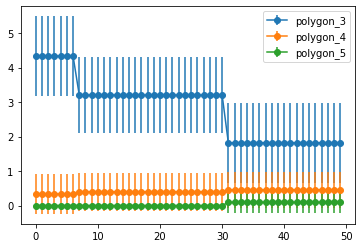

In [7]:
fig, ax = plt.subplots()

xs = range(len(all_puzzles.groupby("sample")))
for col in list(all_puzzles.columns):
    if "polygon_" in col:
        ax.errorbar(xs,
                    all_puzzles.groupby("sample")[col].mean().values.tolist(),
                    all_puzzles.groupby("sample")[col].std().values.tolist(),
                    fmt="-o",label=col)
ax.legend()
plt.show()

#Plot expected value and variance at configuration level (n_interior+n_convex_hull)

In [8]:
# all_puzzles.groupby(["n_convex_hull","n_interior"])[[col for col in list(all_puzzles.columns) if "polygon_" in col]].std()
all_puzzles.groupby(["n_convex_hull","n_interior"])[[col for col in list(all_puzzles.columns) if "polygon_" in col]].mean()

,,polygon_3,polygon_4,polygon_5
n_convex_hull,n_interior,,,
3,2,4.333333,0.333333,0.000000
4,1,3.200000,0.400000,0.000000
5,0,1.818182,0.454545,0.090909


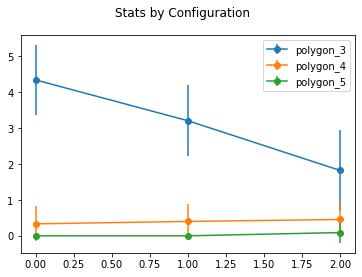

In [9]:
fig, ax = plt.subplots()
groupby = all_puzzles.groupby(["n_convex_hull","n_interior"])

xs = range(len(groupby))
for col in list(all_puzzles.columns):
    if "polygon_" in col:
        ax.errorbar(xs,
                    groupby[col].mean().values.tolist(),
                    groupby[col].std().values.tolist(),
                    fmt="-o",label=col)
fig.suptitle("Stats by Configuration")
ax.legend()
plt.show()

#Plot expected value and variance at all puzzle level

NotImplementedError: Change it to plot  instaead error bar

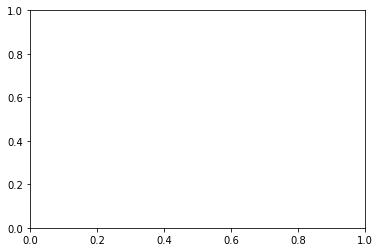

In [10]:
fig, ax = plt.subplots()
groupby = all_puzzles.groupby(["name"])

xs = range(len(groupby))
for col in list(all_puzzles.columns):
    if "polygon_" in col:
        # Change it to plot 
        raise NotImplementedError("Change it to plot  instaead error bar")
        ax.errorbar(xs,
                    groupby[col].mean().values.tolist(),
                    groupby[col].std().values.tolist(),
                    fmt="-o",label=col)
fig.suptitle("Stats by puzzle")
ax.legend()
plt.show()

Calculating the number of puzzles per sampling and configuration

In [37]:
df_samples = all_puzzles[["sample","n_convex_hull","n_interior"]].groupby(["sample","n_convex_hull","n_interior"]).size().reset_index(name="n_puzzles")
df_samples.head(10)

,sample,n_convex_hull,n_interior,n_puzzles
0,convex_hull-3-int-2-2299,3,2,3
1,convex_hull-3-int-2-244,3,2,3
2,convex_hull-3-int-2-387,3,2,3
3,convex_hull-3-int-2-3978,3,2,3
4,convex_hull-3-int-2-5106,3,2,3
5,convex_hull-3-int-2-5475,3,2,3
6,convex_hull-3-int-2-6335,3,2,3
7,convex_hull-4-int-1-1074,4,1,5
8,convex_hull-4-int-1-1552,4,1,5
9,convex_hull-4-int-1-1574,4,1,5


In [42]:
print(df_samples.groupby(["n_convex_hull","n_interior"])["n_puzzles"].size().reset_index(name="n_samples"))
print(df_samples.groupby(["n_convex_hull","n_interior"])["n_puzzles"].mean().reset_index(name="mean_n_puzzles"))
print(df_samples.groupby(["n_convex_hull","n_interior"])["n_puzzles"].std().reset_index(name="std_n_puzzles"))

   n_convex_hull  n_interior  n_samples
0              3           2          7
1              4           1         24
2              5           0         19
   n_convex_hull  n_interior  mean_n_puzzles
0              3           2               3
1              4           1               5
2              5           0              11
   n_convex_hull  n_interior  std_n_puzzles
0              3           2            0.0
1              4           1            0.0
2              5           0            0.0


50